### Introduction

This notebook tries to utilize neural network as a function approximation .. 

Link: https://towardsdatascience.com/the-approximation-power-of-neural-networks-with-python-codes-ddfc250bdb58

In [36]:
from pynverse import inversefunc
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [49]:
w = 500
upper, lower = 6, -6
num = 100

def identity_activation(x):
    return(x)

def solve_for_bias(s, w=w):
    return(-w * s)

steps = [0,.2,.2,.4,.4,.6,.6,.8,.8,1]
bias_hl = np.array([solve_for_bias(s) for s in steps])
weights_hl = np.array([w] * len(steps))
bias_output = 0
weights_output =np.array(np.random.random(10))

In [50]:
def sigmoid_activation(x):
    if x > upper:
        return 1
    elif x < lower:
        return 0
    return 1/(1+np.exp(-x))

In [51]:
def nn(input_value):
    
    Z_hl = input_value * weights_hl + bias_hl
    activation_hl = np.array([sigmoid_activation(Z) for Z in Z_hl])
    Z_output = np.sum(activation_hl * weights_output) + bias_output
    activation_output = identity_activation(Z_output) 
    
    return activation_output

In [52]:
x_values = np.linspace(0,1,1000)
y_hat = [nn(x) for x in x_values]

(0, 1)

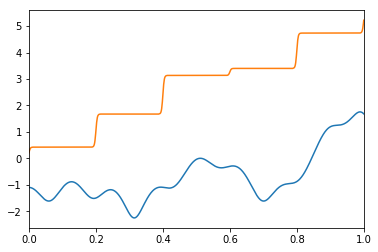

In [53]:
def f(x):
    return 0.2 + 0.4*(x**2) + 0.3*x*np.sin(15*x)+ 0.05*np.cos(50*x)

y = [f(x) for x in x_values]
inv_sigmoid = inversefunc(sigmoid_activation)
y_hat = [nn(x) for x in x_values]
y_invsig = [inv_sigmoid(i) for i in y]

plt.plot(x_values, y_invsig)
plt.plot(x_values, y_hat)
plt.xlim((0,1))